In [1]:
import glob
import pandas as pd
import numpy as np
import os
from scipy import stats
import seaborn as sns

In [2]:
commission = pd.read_excel('Case challenge_ DA.xlsx', sheet_name=1, engine='openpyxl')
transactions = pd.read_excel('Case challenge_ DA.xlsx', sheet_name=2, engine='openpyxl')
user = pd.read_excel('Case challenge_ DA.xlsx', sheet_name=3, engine='openpyxl')

In [3]:
transactions.drop_duplicates().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13496 entries, 0 to 13495
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   user_id          13495 non-null  float64       
 1   order_id         13495 non-null  float64       
 2   Date             13495 non-null  datetime64[ns]
 3   Amount           13495 non-null  float64       
 4   Merchant_id      13495 non-null  float64       
 5   Purchase_status  2235 non-null   object        
 6   Partner_id       2235 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 843.5+ KB


In [4]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13496 entries, 0 to 13495
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   user_id          13495 non-null  float64       
 1   order_id         13495 non-null  float64       
 2   Date             13495 non-null  datetime64[ns]
 3   Amount           13495 non-null  float64       
 4   Merchant_id      13495 non-null  float64       
 5   Purchase_status  2235 non-null   object        
 6   Partner_id       2235 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 738.2+ KB


In [5]:
commission

,Merchant_name,Merchant_id,Rate_pct
0,Viettel,12.0,2.0
1,Mobifone,13.0,3.0
2,Vinaphone,14.0,4.0
3,Vietnamobile,15.0,4.0
4,Gmobile,16.0,4.0
...,...,...,...
994,NaN,NaN,NaN
995,NaN,NaN,NaN
996,NaN,NaN,NaN
997,NaN,NaN,NaN


In [6]:
transactions.head()

,user_id,order_id,Date,Amount,Merchant_id,Purchase_status,Partner_id
0,21269588.0,4.169518e+09,2020-01-01,10000.0,13.0,NaN,NaN
1,28097592.0,4.170277e+09,2020-01-01,20000.0,13.0,NaN,NaN
2,47435144.0,4.166729e+09,2020-01-01,10000.0,12.0,NaN,NaN
3,29080935.0,4.174460e+09,2020-01-01,10000.0,13.0,NaN,NaN
4,14591075.0,4.168217e+09,2020-01-01,10000.0,12.0,NaN,NaN


In [7]:
user.head()

,User_id,First_tran_date,Location,Age,Gender
0,3891001,2019-11-15,Hồ Chí Minh,>37,MALE
1,52571990,2020-01-14,Hồ Chí Minh,>37,MALE
2,366389,2018-09-21,Other Cities,>37,MALE
3,51104816,2020-04-13,Other Cities,>37,MALE
4,7710245,2018-12-21,Other Cities,>37,MALE


# Part 1: Combine & Explore

In [8]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13496 entries, 0 to 13495
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   user_id          13495 non-null  float64       
 1   order_id         13495 non-null  float64       
 2   Date             13495 non-null  datetime64[ns]
 3   Amount           13495 non-null  float64       
 4   Merchant_id      13495 non-null  float64       
 5   Purchase_status  2235 non-null   object        
 6   Partner_id       2235 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 738.2+ KB


In [9]:
commission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Merchant_name  5 non-null      object 
 1   Merchant_id    5 non-null      float64
 2   Rate_pct       5 non-null      float64
dtypes: float64(2), object(1)
memory usage: 23.5+ KB


In [10]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13428 entries, 0 to 13427
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   User_id          13428 non-null  int64         
 1   First_tran_date  13428 non-null  datetime64[ns]
 2   Location         13428 non-null  object        
 3   Age              13428 non-null  object        
 4   Gender           13428 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 524.7+ KB


In [11]:
transactions.columns = [i.lower() for i in transactions.columns]
commission.columns = [i.lower() for i in commission.columns]
user.columns = [i.lower() for i in user.columns]

## Merge with the transactions table

In [12]:
new_df = transactions.merge(commission, left_on = 'merchant_id', right_on = 'merchant_id')

In [13]:
new_df.head()

,user_id,order_id,date,amount,merchant_id,purchase_status,partner_id,merchant_name,rate_pct
0,21269588.0,4.169518e+09,2020-01-01,10000.0,13.0,NaN,NaN,Mobifone,3.0
1,28097592.0,4.170277e+09,2020-01-01,20000.0,13.0,NaN,NaN,Mobifone,3.0
2,29080935.0,4.174460e+09,2020-01-01,10000.0,13.0,NaN,NaN,Mobifone,3.0
3,50568745.0,4.168401e+09,2020-01-01,10000.0,13.0,NaN,NaN,Mobifone,3.0
4,42275799.0,4.174263e+09,2020-01-01,50000.0,13.0,NaN,NaN,Mobifone,3.0


## Create Revenue 

In [14]:
new_df['revenue_per_order'] = new_df.amount * new_df.rate_pct / 100

In [15]:
new_df.head()

,user_id,order_id,date,amount,merchant_id,purchase_status,partner_id,merchant_name,rate_pct,revenue_per_order
0,21269588.0,4.169518e+09,2020-01-01,10000.0,13.0,NaN,NaN,Mobifone,3.0,300.0
1,28097592.0,4.170277e+09,2020-01-01,20000.0,13.0,NaN,NaN,Mobifone,3.0,600.0
2,29080935.0,4.174460e+09,2020-01-01,10000.0,13.0,NaN,NaN,Mobifone,3.0,300.0
3,50568745.0,4.168401e+09,2020-01-01,10000.0,13.0,NaN,NaN,Mobifone,3.0,300.0
4,42275799.0,4.174263e+09,2020-01-01,50000.0,13.0,NaN,NaN,Mobifone,3.0,1500.0


In [16]:
pd.DatetimeIndex(new_df.date).year.unique()

Float64Index([2020.0, nan], dtype='float64', name='date')

In [17]:
new_df['month'] = new_df.date.dt.strftime('%m')

### Revenue in January

In [18]:
new_df[new_df.month == '01'].revenue_per_order.sum()


1409827.02

In [19]:
new_df[new_df.date.dt.strftime('%Y-%m') == '2020-01'].revenue_per_order.sum()

1409827.02

## Merge with User table

In [20]:
new_df_2 = new_df.merge(user, left_on = 'user_id', right_on = 'user_id')

In [21]:
new_df_2.head()

,user_id,order_id,date,amount,merchant_id,purchase_status,partner_id,merchant_name,rate_pct,revenue_per_order,month,first_tran_date,location,age,gender
0,21269588.0,4.169518e+09,2020-01-01,10000.0,13.0,NaN,NaN,Mobifone,3.0,300.0,01,2018-12-11,Hà Nội,>37,FEMALE
1,28097592.0,4.170277e+09,2020-01-01,20000.0,13.0,NaN,NaN,Mobifone,3.0,600.0,01,2019-12-30,Hà Nội,>37,FEMALE
2,29080935.0,4.174460e+09,2020-01-01,10000.0,13.0,NaN,NaN,Mobifone,3.0,300.0,01,2019-10-24,Hà Nội,18_to_22,FEMALE
3,50568745.0,4.168401e+09,2020-01-01,10000.0,13.0,NaN,NaN,Mobifone,3.0,300.0,01,2019-11-07,Other Cities,23_to_27,FEMALE
4,42275799.0,4.174263e+09,2020-01-01,50000.0,13.0,NaN,NaN,Mobifone,3.0,1500.0,01,2019-10-18,Hà Nội,28_to_32,FEMALE


## Current or New

In [22]:
new_df_2['type_user'] = 'Current'
new_df_2.loc[new_df_2.first_tran_date.dt.strftime('%Y-%m') >= '2020-01', 'type_user'] = 'New'

In [23]:
new_df_2[new_df_2.first_tran_date.dt.strftime('%Y-%m') >= '2020-01'].head()

,user_id,order_id,date,amount,merchant_id,purchase_status,partner_id,merchant_name,rate_pct,revenue_per_order,month,first_tran_date,location,age,gender,type_user
16,51720976.0,4.181663e+09,2020-01-02,200000.0,13.0,Mua hộ,59232051.0,Mobifone,3.0,6000.0,01,2020-01-01,Hồ Chí Minh,33_to_37,FEMALE,New
39,28192570.0,4.204928e+09,2020-01-05,20000.0,13.0,NaN,NaN,Mobifone,3.0,600.0,01,2020-01-03,Other Cities,33_to_37,MALE,New
76,7632573.0,4.255451e+09,2020-01-10,20000.0,13.0,NaN,NaN,Mobifone,3.0,600.0,01,2020-01-08,Other Cities,28_to_32,FEMALE,New
108,52134740.0,4.275322e+09,2020-01-13,100000.0,13.0,NaN,NaN,Mobifone,3.0,3000.0,01,2020-01-06,Other Cities,28_to_32,MALE,New
128,3670903.0,4.300162e+09,2020-01-15,20000.0,13.0,NaN,NaN,Mobifone,3.0,600.0,01,2020-01-15,Unknown,unknown,MALE,New


In [24]:
new_df_2[(new_df_2.type_user == 'New') & (new_df_2.first_tran_date.dt.strftime('%Y-%m') < '2020-02')]

,user_id,order_id,date,amount,merchant_id,purchase_status,partner_id,merchant_name,rate_pct,revenue_per_order,month,first_tran_date,location,age,gender,type_user
16,51720976.0,4.181663e+09,2020-01-02,200000.0,13.0,Mua hộ,59232051.0,Mobifone,3.0,6000.0,01,2020-01-01,Hồ Chí Minh,33_to_37,FEMALE,New
39,28192570.0,4.204928e+09,2020-01-05,20000.0,13.0,NaN,NaN,Mobifone,3.0,600.0,01,2020-01-03,Other Cities,33_to_37,MALE,New
76,7632573.0,4.255451e+09,2020-01-10,20000.0,13.0,NaN,NaN,Mobifone,3.0,600.0,01,2020-01-08,Other Cities,28_to_32,FEMALE,New
108,52134740.0,4.275322e+09,2020-01-13,100000.0,13.0,NaN,NaN,Mobifone,3.0,3000.0,01,2020-01-06,Other Cities,28_to_32,MALE,New
128,3670903.0,4.300162e+09,2020-01-15,20000.0,13.0,NaN,NaN,Mobifone,3.0,600.0,01,2020-01-15,Unknown,unknown,MALE,New
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13413,41856135.0,8.346501e+09,2020-12-07,10000.0,14.0,NaN,NaN,Vinaphone,4.0,400.0,12,2020-01-20,Other Cities,18_to_22,MALE,New
13414,46699512.0,8.345857e+09,2020-12-07,50000.0,14.0,Mua hộ,29458193.0,Vinaphone,4.0,2000.0,12,2020-01-22,Other Cities,>37,MALE,New
13457,14991800.0,8.470262e+09,2020-12-15,50000.0,14.0,NaN,NaN,Vinaphone,4.0,2000.0,12,2020-01-19,Other Cities,23_to_27,FEMALE,New
13501,44484476.0,8.597520e+09,2020-12-23,50000.0,14.0,NaN,NaN,Vinaphone,4.0,2000.0,12,2020-01-11,Hồ Chí Minh,>37,FEMALE,New


In [25]:
new_df_2['new_in_Jan'] = False
new_df_2.loc[(new_df_2.type_user == 'New') & (new_df_2.first_tran_date.dt.strftime('%Y-%m') == '2020-01'), 'new_in_Jan'] = True

## Total new user In Jan

In [26]:
new_df_2[new_df_2.new_in_Jan == True].user_id.nunique()

603

In [27]:
new_df_2

,user_id,order_id,date,amount,merchant_id,purchase_status,partner_id,merchant_name,rate_pct,revenue_per_order,month,first_tran_date,location,age,gender,type_user,new_in_Jan
0,21269588.0,4.169518e+09,2020-01-01,10000.0,13.0,NaN,NaN,Mobifone,3.0,300.0,01,2018-12-11,Hà Nội,>37,FEMALE,Current,False
1,28097592.0,4.170277e+09,2020-01-01,20000.0,13.0,NaN,NaN,Mobifone,3.0,600.0,01,2019-12-30,Hà Nội,>37,FEMALE,Current,False
2,29080935.0,4.174460e+09,2020-01-01,10000.0,13.0,NaN,NaN,Mobifone,3.0,300.0,01,2019-10-24,Hà Nội,18_to_22,FEMALE,Current,False
3,50568745.0,4.168401e+09,2020-01-01,10000.0,13.0,NaN,NaN,Mobifone,3.0,300.0,01,2019-11-07,Other Cities,23_to_27,FEMALE,Current,False
4,42275799.0,4.174263e+09,2020-01-01,50000.0,13.0,NaN,NaN,Mobifone,3.0,1500.0,01,2019-10-18,Hà Nội,28_to_32,FEMALE,Current,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13571,1093979.0,8.721689e+09,2020-12-31,50000.0,14.0,NaN,NaN,Vinaphone,4.0,2000.0,12,2019-08-01,Other Cities,unknown,MALE,Current,False
13572,8309420.0,8.720961e+09,2020-12-31,10000.0,14.0,NaN,NaN,Vinaphone,4.0,400.0,12,2020-01-31,Other Cities,unknown,FEMALE,New,True
13573,50343168.0,4.849822e+09,2020-02-21,50000.0,16.0,NaN,NaN,Gmobile,4.0,2000.0,02,2019-11-24,Hồ Chí Minh,23_to_27,MALE,Current,False
13574,48271969.0,6.746001e+09,2020-08-19,20000.0,16.0,NaN,NaN,Gmobile,4.0,800.0,08,2019-07-23,Other Cities,28_to_32,MALE,Current,False


In [28]:
#new_df_2.to_excel('new_combined_table2.xlsx')

In [29]:
new_df_2.gender.value_counts()

MALE      7898
FEMALE    5678
Name: gender, dtype: int64

In [30]:
new_df_2.location.value_counts()

Other Cities    7131
Hồ Chí Minh     4229
Hà Nội          1450
Unknown          766
Name: location, dtype: int64

In [31]:
new_df_2.amount.value_counts()

20000.0      3366
10000.0      3257
50000.0      3126
100000.0     2251
30000.0       835
200000.0      475
300000.0      113
500000.0      100
40000.0        31
60000.0         8
1000000.0       6
400000.0        3
2500000.0       2
294234.0        1
2000000.0       1
250000.0        1
Name: amount, dtype: int64

In [32]:
new_df_2.age.value_counts()

23_to_27    3452
28_to_32    2829
unknown     2541
33_to_37    1774
18_to_22    1706
>37         1274
Name: age, dtype: int64

In [33]:
new_df_2.amount.max()

2500000.0

In [34]:
new_df_2.purchase_status.fillna('Bản Thân', inplace = True)

### For amount segment

In [35]:
bins = pd.IntervalIndex.from_tuples([(0, 50000), (50000, 200000), (200000, 2600000)])

In [36]:
new_df_2['amount_bin'] = pd.cut(new_df_2.amount, bins = bins)

In [37]:
new_df_2.age.unique()

array(['>37', '18_to_22', '23_to_27', '28_to_32', '33_to_37', 'unknown'],
      dtype=object)

<AxesSubplot:xlabel='amount_bin', ylabel='count'>

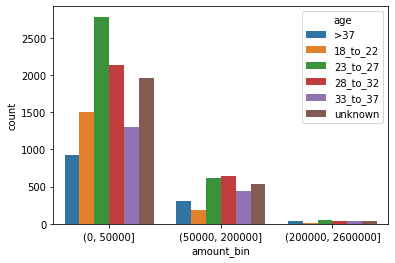

In [38]:
sns.countplot(data = new_df_2, x = 'amount_bin', hue = 'age')

In [39]:
new_df_2['age'] = pd.Categorical(new_df_2['age'], categories= ['18_to_22', '23_to_27','28_to_32', '33_to_37', '>37', 'unknown']
                                ,ordered=True)

In [40]:
new_df_2.purchase_status.value_counts()

Bản Thân    11292
Mua hộ       2284
Name: purchase_status, dtype: int64

In [41]:
new_df_2[(new_df_2.purchase_status == 'Mua hộ') ].revenue_per_order.sum()

7323627.02

In [42]:
new_df_2[new_df_2.purchase_status != 'Mua hộ'].revenue_per_order.sum()

11591700.0

## Most of `Mua hộ` amount is higher than those of `Bản Thân`

<AxesSubplot:xlabel='purchase_status', ylabel='amount'>

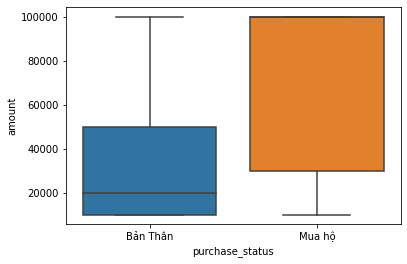

In [43]:
sns.boxplot(data = new_df_2[new_df_2.amount < 200000], x = 'purchase_status', y = 'amount')

In [44]:
new_df_2['new_in_month'] = 'not new in 2020'

new_df_2.loc[new_df_2.first_tran_date.dt.strftime('%Y-%m') >= '2020-01', 'new_in_month'] = new_df_2[new_df_2.first_tran_date.dt.strftime('%Y-%m') >= '2020-01']\
                                                                                            .first_tran_date\
                                                                                            .dt\
                                                                                            .strftime('%m')

In [45]:
new_df_2[['new_in_month','first_tran_date']][new_df_2.new_in_month == '05']

,new_in_month,first_tran_date
1204,05,2020-05-03
1208,05,2020-05-04
1212,05,2020-05-04
1227,05,2020-05-06
1248,05,2020-05-07
...,...,...
13394,05,2020-05-29
13482,05,2020-05-27
13493,05,2020-05-08
13521,05,2020-05-10


In [46]:
#new_df_2.new_in_month.reset_index().to_excel('new_in_month.xlsx')
new_df_2.dtypes

user_id                     float64
order_id                    float64
date                 datetime64[ns]
amount                      float64
merchant_id                 float64
purchase_status              object
partner_id                  float64
merchant_name                object
rate_pct                    float64
revenue_per_order           float64
month                        object
first_tran_date      datetime64[ns]
location                     object
age                        category
gender                       object
type_user                    object
new_in_Jan                     bool
amount_bin                 category
new_in_month                 object
dtype: object

In [47]:
#new_df_2.purchase_status.to_excel('purchase_status.xlsx')

<AxesSubplot:xlabel='age', ylabel='count'>

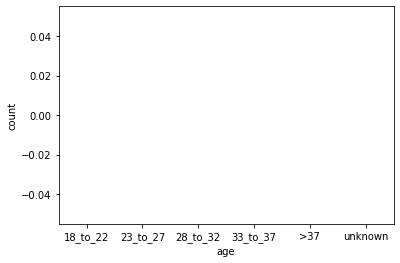

In [48]:
sns.countplot(data = new_df_2[new_df_2.new_in_month == 'January'], x = 'age')

In [49]:
new_df_2.groupby('new_in_month').user_id.count().reset_index().sort_values('new_in_month')

,new_in_month,user_id
0,01,616
1,02,673
2,03,624
3,04,484
4,05,383
5,06,310
6,07,314
7,08,297
8,09,240
9,10,210


In [50]:
new_df_2.groupby('new_in_month').user_id.nunique()

new_in_month
01                  603
02                  668
03                  617
04                  476
05                  377
06                  304
07                  311
08                  294
09                  234
10                  207
11                  158
12                   76
not new in 2020    9065
Name: user_id, dtype: int64

In [51]:
new_df_2[new_df_2.type_user == 'Current'].groupby('month').user_id.count().reset_index().sort_values('month')

,month,user_id
0,01,917
1,02,822
2,03,850
3,04,743
4,05,790
5,06,796
6,07,778
7,08,694
8,09,715
9,10,696


# Part 2: Predict and calculate

In [52]:
cash_back = pd.read_excel('cash_back.xlsx', sheet_name = 'Sheet1', engine='openpyxl')

In [53]:
cash_back.drop(cash_back.columns[1], axis = 1, inplace = True)

In [54]:
new_df_2 = new_df_2.merge(cash_back, left_on = 'merchant_name', right_on = 'Merchant')

In [55]:
new_df_2.month = pd.to_numeric(new_df_2.month)

In [56]:
revenue_by_merchant = new_df_2.groupby(['merchant_name','month']).revenue_per_order.sum().reset_index()

In [57]:
revenue_by_merchant

,merchant_name,month,revenue_per_order
0,Gmobile,2,2000.00
1,Gmobile,8,800.00
2,Gmobile,9,400.00
3,Mobifone,1,456427.02
4,Mobifone,2,407100.00
5,Mobifone,3,513600.00
6,Mobifone,4,424500.00
7,Mobifone,5,465000.00
8,Mobifone,6,539400.00
9,Mobifone,7,459000.00


In [58]:
revenue_pivot = revenue_by_merchant.pivot(index = 'merchant_name', columns = 'month', values = 'revenue_per_order')

In [59]:
a = revenue_pivot.unstack(fill_value = 0).reset_index().rename(columns= {0: 'value'})
a.fillna(0, inplace = True)
a.head()

,month,merchant_name,value
0,1,Gmobile,0.00
1,1,Mobifone,456427.02
2,1,Vietnamobile,45600.00
3,1,Viettel,591200.00
4,1,Vinaphone,317200.00


## Using least squared regression  or linear regression

In [60]:
X = range(1,13,1)
lst = []
for merchant in a.merchant_name.unique():
    revenue = a[a.merchant_name == merchant]['value'].values
    slope, intercept, r_value, p_value, std_err = stats.linregress(X,revenue)
    lst.append([merchant,slope,intercept])
    

In [61]:
lst

[['Gmobile', -47.55244755244755, 575.7575757575758],
 ['Mobifone', 8160.149580419579, 432269.6127272727],
 ['Vietnamobile', 6321.678321678322, 31842.424242424233],
 ['Viettel', 10872.727272727272, 530293.9393939393],
 ['Vinaphone', 2089.5104895104896, 403218.1818181818]]

In [62]:
future = pd.DataFrame(columns = ['merchant_name','slope','intercept'], data = lst)

In [63]:
a = a.merge(future, left_on = 'merchant_name',right_on = 'merchant_name')

In [64]:
a = a.merge(cash_back,left_on = 'merchant_name',right_on = 'Merchant' )

In [65]:
a = a.merge(commission,left_on = 'merchant_name',right_on = 'merchant_name' )

In [66]:
a['month_2021'] = list(range(13,25,1))*5
a['revenue_2021_end'] = round(2*(a.month_2021 *a.slope + a.intercept)) # I double It
a.loc[a['revenue_2021_end'] < 0, 'revenue_2021_end'] = 0
a['net_revenue_2021'] = round(a.revenue_2021_end*(1 - a.cashback/a.rate_pct))

print(a.net_revenue_2021.sum()/a.value.sum())

0.3106970338808343


<AxesSubplot:xlabel='month', ylabel='value'>

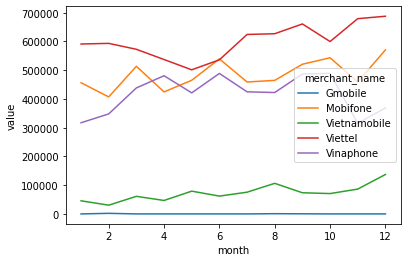

In [67]:
sns.lineplot(data = a, x = 'month', y = 'value', hue = 'merchant_name')

<AxesSubplot:xlabel='month', ylabel='revenue_2021_end'>

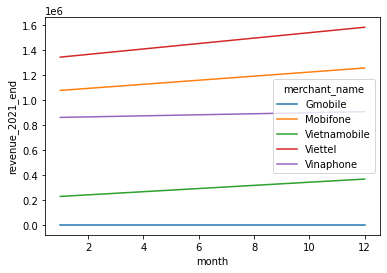

In [68]:
sns.lineplot(data = a, x = 'month', y = 'revenue_2021_end', hue = 'merchant_name')

# The idea of " Six degree of separation "

In [69]:
six_degree = new_df_2[(new_df_2.purchase_status == 'Mua hộ') & (new_df_2.month == 12)][['user_id','partner_id']].sort_values('user_id')
six_degree

,user_id,partner_id
12436,582000.0,8883311.0
12846,967948.0,1330126.0
13537,1362547.0,42082939.0
12906,1473606.0,59401960.0
3428,1738631.0,29672066.0
...,...,...
12896,60382790.0,18028854.0
13525,60705250.0,60809815.0
12620,60714862.0,36046277.0
12546,60943572.0,18028854.0


#### User must be in a circle right? so they have to be eigther of sender and reciever.
#### This code will remove the only reciever and the only sender.

In [70]:
haha = six_degree[['user_id','partner_id']].drop_duplicates().copy()

while True:
    
    intersect = np.intersect1d(haha.user_id, haha.partner_id)
    #print(intersect)
    haha = haha[(haha.user_id.isin(intersect)) & (haha.partner_id.isin(intersect))]
    new_intersect = np.intersect1d(haha.user_id, haha.partner_id)
    #print(new_intersect)
    if len(intersect) == len(new_intersect):
        if (np.sort(intersect) == np.sort(new_intersect)).all():
            break
    else:
        continue
                

In [71]:
haha['value'] = [1]*len(haha)

In [72]:
x = np.setdiff1d(haha.user_id.unique(), haha.partner_id.unique())

In [73]:
y = np.setdiff1d(haha.partner_id.unique(),haha.user_id.unique())

In [74]:
result = np.transpose([np.tile(y, len(x)), np.repeat(x, len(y))])

In [75]:
df = pd.DataFrame(columns = ['user_id','partner_id'], data = result)
df['value'] = [0]*len(df)

In [76]:
haha = haha.append(df)

In [77]:
haha

,user_id,partner_id,value
6163,3945743.0,51869159.0,1.0
3469,21738274.0,53718234.0,1.0
3431,35505287.0,49097704.0,1.0
3436,35505287.0,58928502.0,1.0
3514,38995940.0,39212599.0,1.0
12586,39212599.0,46506511.0,1.0
3841,46028159.0,35505287.0,1.0
12598,46506511.0,56354395.0,1.0
6168,47277781.0,46028159.0,1.0
3443,49097704.0,21738274.0,1.0


In [78]:
haha.drop_duplicates(inplace = True)

In [79]:
haha = haha.groupby(['user_id','partner_id']).value.sum().reset_index().pivot(index = 'user_id', columns = 'partner_id', values = 'value').fillna(0)

## The idea from hackerank friend circles

In [80]:
haha

partner_id,3945743.0,21738274.0,35505287.0,38995940.0,39212599.0,46028159.0,46506511.0,47277781.0,49097704.0,51869159.0,52983859.0,53718234.0,56354395.0,58928502.0
user_id,,,,,,,,,,,,,,
3945743.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
21738274.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
35505287.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
38995940.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39212599.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46028159.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46506511.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
47277781.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49097704.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
diem = haha.values

In [82]:
haha.values 

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

# Reeeeeeecursive function

In [83]:
def loop (point1,diem, results,lst):
    for point,st in enumerate(diem[:,point1]):
        print('dang o dau diem', point1+1)
        print(point +1 , int(st))
        if st:
            if point not in lst:
                point1 = point
                lst.append(point)
                print(np.array(lst) + 1)
                loop(point1,diem,results,lst)           
            elif point == lst[0]:
                
                results.append(np.array(lst))
                print(lst[0] + 1, results)
            else:
                print(point +1, 'asdfasdfasfd')
                
        if lst and point == 13:
            lst.pop()
        
        

                

In [84]:
global results
results = []
for i in range(len(haha)):
    lst=[]
    lst.append(i)
    point1 = i
    loop(point1,diem,results,lst)

dang o dau diem 1
1 0
dang o dau diem 1
2 0
dang o dau diem 1
3 0
dang o dau diem 1
4 0
dang o dau diem 1
5 0
dang o dau diem 1
6 0
dang o dau diem 1
7 0
dang o dau diem 1
8 0
dang o dau diem 1
9 0
dang o dau diem 1
10 0
dang o dau diem 1
11 1
[ 1 11]
dang o dau diem 11
1 0
dang o dau diem 11
2 0
dang o dau diem 11
3 0
dang o dau diem 11
4 0
dang o dau diem 11
5 0
dang o dau diem 11
6 0
dang o dau diem 11
7 0
dang o dau diem 11
8 0
dang o dau diem 11
9 0
dang o dau diem 11
10 0
dang o dau diem 11
11 0
dang o dau diem 11
12 0
dang o dau diem 11
13 1
[ 1 11 13]
dang o dau diem 13
1 0
dang o dau diem 13
2 0
dang o dau diem 13
3 0
dang o dau diem 13
4 0
dang o dau diem 13
5 0
dang o dau diem 13
6 0
dang o dau diem 13
7 1
[ 1 11 13  7]
dang o dau diem 7
1 0
dang o dau diem 7
2 0
dang o dau diem 7
3 0
dang o dau diem 7
4 0
dang o dau diem 7
5 1
[ 1 11 13  7  5]
dang o dau diem 5
1 0
dang o dau diem 5
2 0
dang o dau diem 5
3 0
dang o dau diem 5
4 1
[ 1 11 13  7  5  4]
dang o dau diem 4
1 0
da

[ 6  8 14  3 10  1 11 13  7  5  4 12  2  9]
dang o dau diem 9
1 0
dang o dau diem 9
2 0
dang o dau diem 9
3 1
3 asdfasdfasfd
dang o dau diem 9
4 0
dang o dau diem 9
5 0
dang o dau diem 9
6 0
dang o dau diem 9
7 0
dang o dau diem 9
8 0
dang o dau diem 9
9 0
dang o dau diem 9
10 0
dang o dau diem 9
11 0
dang o dau diem 9
12 0
dang o dau diem 9
13 0
dang o dau diem 9
14 0
dang o dau diem 9
10 0
dang o dau diem 9
11 0
dang o dau diem 9
12 0
dang o dau diem 9
13 0
dang o dau diem 9
14 0
dang o dau diem 2
3 0
dang o dau diem 2
4 0
dang o dau diem 2
5 0
dang o dau diem 2
6 0
dang o dau diem 2
7 0
dang o dau diem 2
8 0
dang o dau diem 2
9 0
dang o dau diem 2
10 0
dang o dau diem 2
11 0
dang o dau diem 2
12 0
dang o dau diem 2
13 0
dang o dau diem 2
14 0
dang o dau diem 12
13 0
dang o dau diem 12
14 0
dang o dau diem 4
5 0
dang o dau diem 4
6 0
dang o dau diem 4
7 0
dang o dau diem 4
8 0
dang o dau diem 4
9 0
dang o dau diem 4
10 0
dang o dau diem 4
11 0
dang o dau diem 4
12 0
dang o dau diem 4

dang o dau diem 8
10 0
dang o dau diem 8
11 0
dang o dau diem 8
12 0
dang o dau diem 8
13 0
dang o dau diem 8
14 0
dang o dau diem 6
7 0
dang o dau diem 6
8 0
dang o dau diem 6
9 0
dang o dau diem 6
10 1
[11 13  7  5  4 12  2  9  3 10]
dang o dau diem 10
1 1
[11 13  7  5  4 12  2  9  3 10  1]
dang o dau diem 1
1 0
dang o dau diem 1
2 0
dang o dau diem 1
3 0
dang o dau diem 1
4 0
dang o dau diem 1
5 0
dang o dau diem 1
6 0
dang o dau diem 1
7 0
dang o dau diem 1
8 0
dang o dau diem 1
9 0
dang o dau diem 1
10 0
dang o dau diem 1
11 1
11 [array([ 0, 10, 12,  6,  4,  3, 11,  1,  8,  2,  9]), array([ 1,  8,  2,  9,  0, 10, 12,  6,  4,  3, 11]), array([ 2,  5,  7, 13]), array([ 2,  9,  0, 10, 12,  6,  4,  3, 11,  1,  8]), array([ 3, 11,  1,  8,  2,  9,  0, 10, 12,  6,  4]), array([ 4,  3, 11,  1,  8,  2,  9,  0, 10, 12,  6]), array([ 5,  7, 13,  2]), array([ 6,  4,  3, 11,  1,  8,  2,  9,  0, 10, 12]), array([ 7, 13,  2,  5]), array([ 8,  2,  9,  0, 10, 12,  6,  4,  3, 11,  1]), array([ 9,  

## the result is the index of user_id
## There are many circle with the same size. But it looks like they are duplicated

In [105]:
results

[array([ 0, 10, 12,  6,  4,  3, 11,  1,  8,  2,  9]),
 array([ 1,  8,  2,  9,  0, 10, 12,  6,  4,  3, 11]),
 array([ 2,  5,  7, 13]),
 array([ 2,  9,  0, 10, 12,  6,  4,  3, 11,  1,  8]),
 array([ 3, 11,  1,  8,  2,  9,  0, 10, 12,  6,  4]),
 array([ 4,  3, 11,  1,  8,  2,  9,  0, 10, 12,  6]),
 array([ 5,  7, 13,  2]),
 array([ 6,  4,  3, 11,  1,  8,  2,  9,  0, 10, 12]),
 array([ 7, 13,  2,  5]),
 array([ 8,  2,  9,  0, 10, 12,  6,  4,  3, 11,  1]),
 array([ 9,  0, 10, 12,  6,  4,  3, 11,  1,  8,  2]),
 array([10, 12,  6,  4,  3, 11,  1,  8,  2,  9,  0]),
 array([11,  1,  8,  2,  9,  0, 10, 12,  6,  4,  3]),
 array([12,  6,  4,  3, 11,  1,  8,  2,  9,  0, 10]),
 array([13,  2,  5,  7])]

In [106]:
g = pd.DataFrame(data = {'circle':results})
g['size'] = 0
for i in range(len(g)):
    
    g.circle.iloc[i] = np.sort(g.circle.iloc[i])
    g.loc[i, 'size'] = len(g.circle.iloc[i])
    
    
    g.circle.iloc[i] = ','.join(str(j) for j in g.circle.iloc[i])
    #g.loc[i, 'size'] = len(g.loc[i, 'col'])
    
    

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [107]:
g.drop_duplicates()

,circle,size
0,"0,1,2,3,4,6,8,9,10,11,12",11
2,"2,5,7,13",4
